In [12]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from branca.colormap import linear
import matplotlib.pyplot as plt


In [ ]:


# Load the Excel file
xlsx_file = pd.read_excel('/Users/happyeveryday/Downloads/North_Fulton/South Fulton TRI data 2020-2022.xlsx')

# Write the data to a CSV file
xlsx_file.to_csv('/Users/happyeveryday/Downloads/North_Fulton/South Fulton TRI data 2020-2022_csv.csv', index=False)

# Read the CSV data into a DataFrame
data = pd.read_csv("/Users/happyeveryday/Downloads/North_Fulton/South Fulton TRI data 2020-2022_csv.csv")

# Convert "Releases (lb)" column to numeric data type
data["Releases (lb)"] = pd.to_numeric(data["Releases (lb)"], errors="coerce")

# Group by ZIP Code and sum the total releases
zip_totals = data.groupby("ZIP Code")["Releases (lb)"].sum().reset_index()

# Create a base map centered on South Fulton, GA
map_center = [33.587944, -84.567375]  # Coordinates for South Fulton, GA
pollution_map = folium.Map(location=map_center, zoom_start=11)

# Create a choropleth map based on total releases by ZIP Code
choropleth = folium.Choropleth(
    geo_data="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ga_georgia_zip_codes_geo.min.json",
    name="Pollution Levels",
    data=zip_totals,
    columns=["ZIP Code", "Releases (lb)"],
    key_on="feature.properties.ZCTA5CE10",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Releases (lbs)",
).add_to(pollution_map)

# Add a color scale legend
colormap = linear.YlOrRd_09.scale(
    zip_totals["Releases (lb)"].min(), zip_totals["Releases (lb)"].max()
)
colormap.caption = "Total Releases (lbs)"
pollution_map.add_child(colormap)

# Add markers for each facility
marker_cluster = MarkerCluster().add_to(pollution_map)
for _, row in data.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"Facility: {row['TRI Facility Name']}<br>Total Releases: {row['Releases (lb)']} lbs",
        icon=folium.Icon(color="green", icon="industry", prefix="fa"),
    ).add_to(marker_cluster)

# Display the map
pollution_map

In [6]:
# display the map
pollution_map.save("/Users/happyeveryday/Downloads/pollution_map.html")

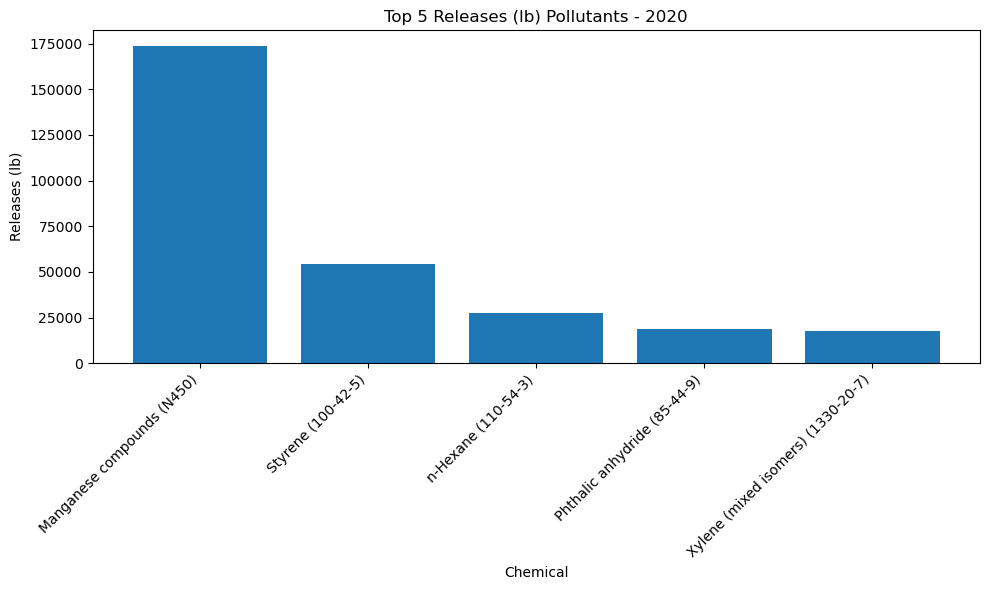

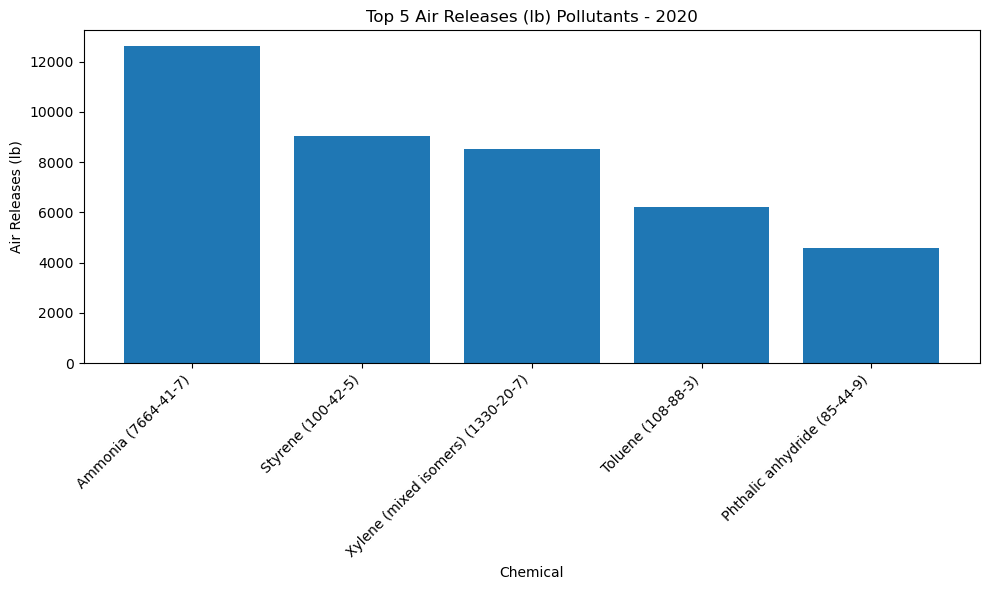

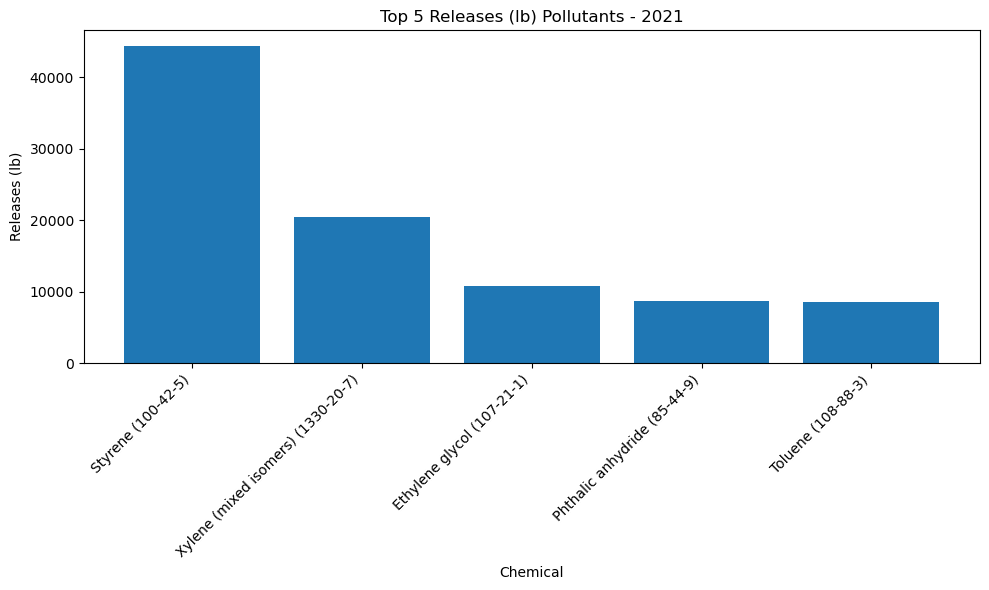

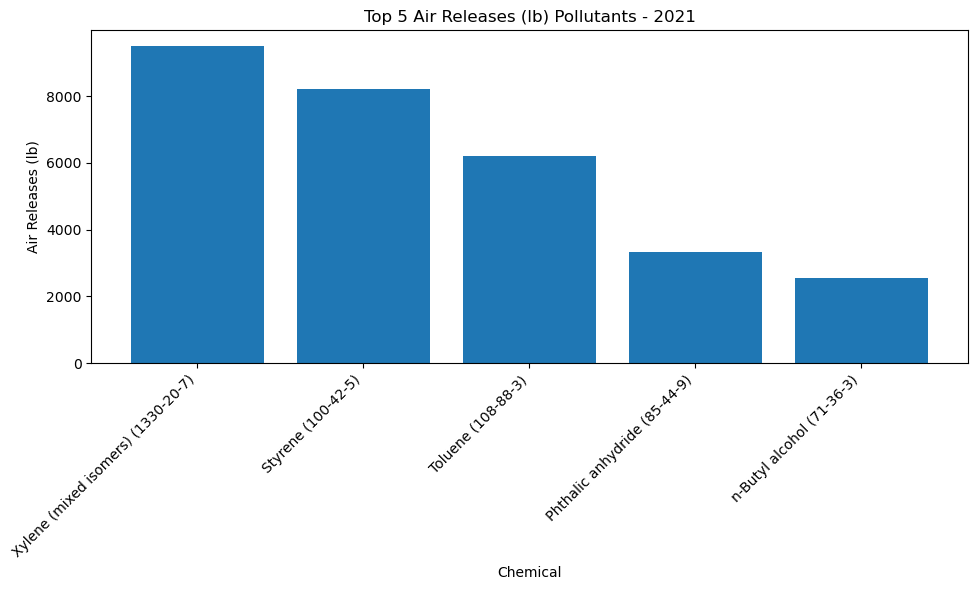

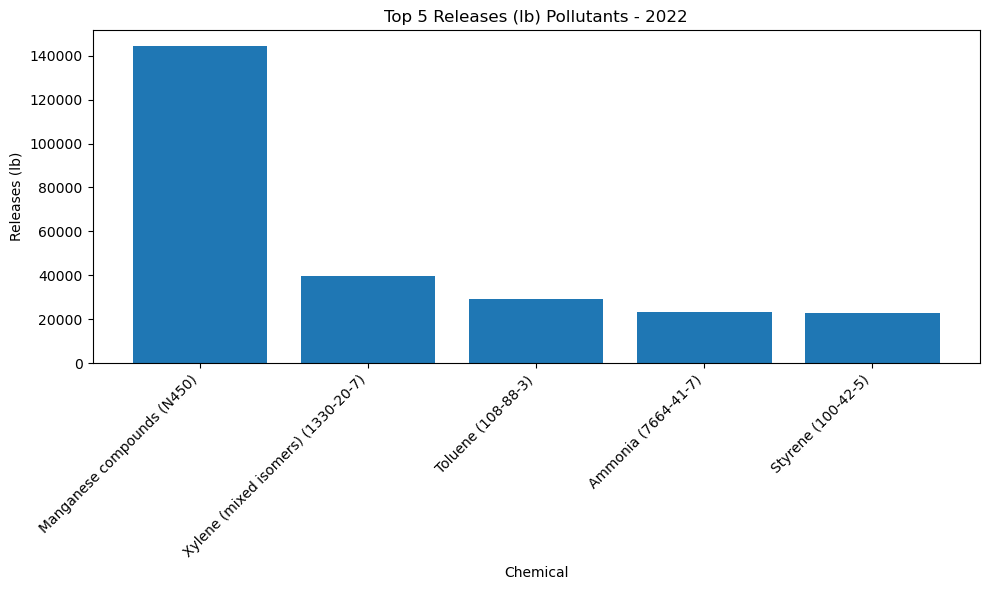

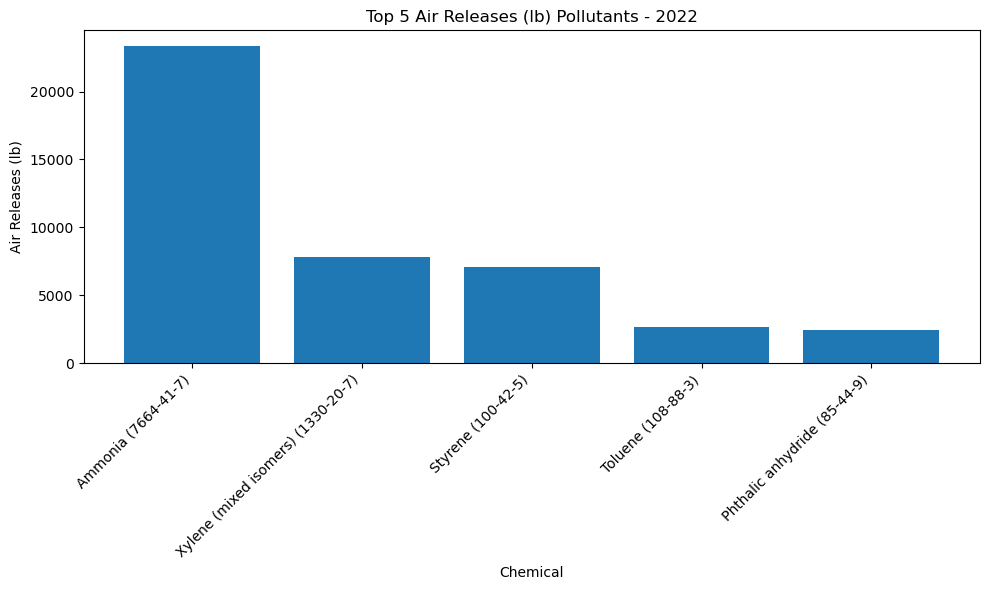

In [13]:
# Convert "Releases (lb)" and "Air Releases (lb)" columns to numeric data type
data["Releases (lb)"] = pd.to_numeric(data["Releases (lb)"], errors="coerce")
data["Air Releases (lb)"] = pd.to_numeric(data["Air Releases (lb)"], errors="coerce")

# Define the available years and pollution types
years = [2020, 2021, 2022]
pollution_types = ["Releases (lb)", "Air Releases (lb)"]

# Create a dictionary to store the top 5 chemical pollutants for each category
top_pollutants = {}

# Iterate over each year
for year in years:
    # Filter the data for the current year
    year_data = data[(data["Year"] == year)]
    
    # Create a dictionary to store the top pollutants for the current year
    top_pollutants[year] = {}
    
    # Iterate over each pollution type
    for pollution_type in pollution_types:
        # Group by chemical and sum the pollution values
        chemical_totals = year_data.groupby("Chemical")[pollution_type].sum().reset_index()
        
        # Sort the chemicals by pollution values in descending order
        top_chemicals = chemical_totals.nlargest(5, pollution_type)
        
        # Store the top 5 pollutants for the current year and pollution type
        top_pollutants[year][pollution_type] = top_chemicals

# Create separate forms for each year and pollution type
for year in years:
    for pollution_type in pollution_types:
        # Get the top 5 pollutants for the current year and pollution type
        top_chemicals = top_pollutants[year][pollution_type]
        
        # Create a bar plot
        plt.figure(figsize=(10, 6))
        plt.bar(top_chemicals["Chemical"], top_chemicals[pollution_type])
        plt.xlabel("Chemical")
        plt.ylabel(pollution_type)
        plt.title(f"Top 5 {pollution_type} Pollutants - {year}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()